## 한글 자연어처리

In [1]:
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False   # 마이너스 표시
plt.rc('font', family = 'Malgun Gothic')

In [4]:
from konlpy.tag import Okt, Kkma, Komoran

In [5]:
okt = Okt()
kkma = Kkma()
kr = Komoran()

In [6]:
text = '열심히 코딩한 당신, 연휴에는 여행을 떠나 보세요'

In [7]:
# 한글 형태소 분석기별 차이점
print(okt.morphs(text))
print(kkma.morphs(text))
print(kr.morphs(text))

['열심히', '코딩', '한', '당신', ',', '연휴', '에는', '여행', '을', '떠나', '보세요']
['열심히', '코딩', '하', 'ㄴ', '당신', ',', '연휴', '에', '는', '여행', '을', '떨', '나', '보', '세요']
['열심히', '코', '딩', '하', 'ㄴ', '당신', ',', '연휴', '에', '는', '여행', '을', '떠나', '아', '보', '시', '어요']


### 품사 태깅 pos (Part-of-Speech tagging)

In [8]:
# 꼬꼬마 한국어 형태소 분석기 http://kkma.snu.ac.kr/documents/?doc=postag

print(okt.pos(text))
print(kkma.pos(text))
print(kr.pos(text))

[('열심히', 'Adverb'), ('코딩', 'Noun'), ('한', 'Josa'), ('당신', 'Noun'), (',', 'Punctuation'), ('연휴', 'Noun'), ('에는', 'Josa'), ('여행', 'Noun'), ('을', 'Josa'), ('떠나', 'Verb'), ('보세요', 'Verb')]
[('열심히', 'MAG'), ('코딩', 'NNG'), ('하', 'XSV'), ('ㄴ', 'ETD'), ('당신', 'NP'), (',', 'SP'), ('연휴', 'NNG'), ('에', 'JKM'), ('는', 'JX'), ('여행', 'NNG'), ('을', 'JKO'), ('떨', 'VV'), ('나', 'ECE'), ('보', 'VV'), ('세요', 'EFN')]
[('열심히', 'MAG'), ('코', 'NNG'), ('딩', 'MAG'), ('하', 'XSV'), ('ㄴ', 'ETM'), ('당신', 'NNP'), (',', 'SP'), ('연휴', 'NNG'), ('에', 'JKB'), ('는', 'JX'), ('여행', 'NNG'), ('을', 'JKO'), ('떠나', 'VV'), ('아', 'EC'), ('보', 'VV'), ('시', 'EP'), ('어요', 'EC')]


In [9]:
# 명사만 추출
print(okt.nouns(text))
print(kkma.nouns(text))
print(kr.nouns(text))

['코딩', '당신', '연휴', '여행']
['코딩', '당신', '연휴', '여행']
['코', '당신', '연휴', '여행']


### 실습. 한빛아카데미

https://www.hanbit.co.kr/academy/books/book_view.html?p_code=B7192437175

책마다 검색하는 tag가 있음

tag들을 크롤링해와서 하나의 list로 담아줌: 

새로나온책
https://www.hanbit.co.kr/academy/books/new_book_list.html

~10page까지

wordcloud로 그려보기

In [10]:
import requests
from bs4 import BeautifulSoup
import time
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from tqdm.notebook import tqdm
import numpy as np

In [58]:
base_url = 'https://www.hanbit.co.kr'
sub_url = '/academy/books/new_book_list.html'

driver = webdriver.Chrome()
time.sleep(2)
url = base_url + sub_url + '?page=' + str(1)  # for문에서는 url아래로만 사용할 것
driver.get(url)
time.sleep(4)
soup = BeautifulSoup(driver.page_source, 'html.parser')

In [80]:
list = soup.select('.sub_book_list_area > li')
lis = list[0]
len(list), lis

(20,
 <li class="sub_book_list">
 <div class="view_box">
 <span class="view_box_block">
 <span class="img_hidden_a">
 <span class="pop_quick_menu">
 <a href="/academy/books/book_view.html?p_code=B4295361584"><img alt="상세보기" src="https://www.hanbit.co.kr/images/common/icon_view_detail.png"/></a>
 </span>
 <span class="price">29,000<span>원</span></span>
 <span class="pop_quick_bg" onclick="location='/academy/books/book_view.html?p_code=B4295361584'"></span>
 </span>
 <!-- 예약도서인 경우 -->
 <!-- ebook이 도서인 경우 -->
 <img alt="" class="thumb" src="/data/books/B4295361584_m.jpg"/>
 </span>
 <div class="info">
 <p class="book_tit"><a href="/academy/books/book_view.html?p_code=B4295361584">IT CookBook, 초연결 사회의 데이터통신과 네트워킹</a></p>
 <p class="book_writer">강문식 </p>
 </div>
 </div>
 </li>)

In [53]:
book_url = lis.select_one('.book_tit > a')['href']
final_url = base_url + book_url
driver.get(final_url)
time.sleep(2)
sp = BeautifulSoup(driver.page_source, 'html.parser')

In [72]:
tags = sp.select('div.tag_area > a')
tags[0].text

'컴퓨터공학'

In [79]:
sp.select('div.tag_area > a')

[<a href="/search/search_list.html?ptype=B&amp;keyword=컴퓨터공학">컴퓨터공학</a>,
 <a href="/search/search_list.html?ptype=B&amp;keyword=컴파일러">컴파일러</a>,
 <a href="/search/search_list.html?ptype=B&amp;keyword=프로그래밍언어론">프로그래밍언어론</a>,
 <a href="/search/search_list.html?ptype=B&amp;keyword=형식언어">형식언어</a>,
 <a href="/search/search_list.html?ptype=B&amp;keyword=오토마타">오토마타</a>,
 <a href="/search/search_list.html?ptype=B&amp;keyword=렉스">렉스</a>,
 <a href="/search/search_list.html?ptype=B&amp;keyword=야크">야크</a>]

In [54]:
tags = sp.select('div.tag_area > a')
list = []
for i in range(1,len(tags)+1):
    list.append(tags[i-1].text)
list

['매트랩', 'MATLAB', '매트랩 프로그래밍']

In [56]:
list = soup.select('.sub_book_list_area > li')

tags_list = []
for lis in list:
    book_url = lis.select_one('.book_tit > a')['href']
    final_url = base_url + book_url
    driver.get(final_url)
    time.sleep(2)
    sp = BeautifulSoup(driver.page_source, 'html.parser')
    tags = sp.select('div.tag_area > a')
    for i in range(1,len(tags)+1):
        tags_list.append(tags[i-1].text)

In [57]:
len(tags_list), tags_list

(113,
 ['매트랩',
  'MATLAB',
  '매트랩 프로그래밍',
  '의학통계',
  '논문',
  '통계',
  '분석',
  '데이터분석',
  'jamovi',
  '메타분석',
  '패널데이터',
  '의사',
  '의학',
  '보건',
  '정보 교육',
  '교과교육론',
  '정보교과교육',
  'SW교육',
  'IT교육',
  '회로',
  '회로실험',
  '회로해석',
  '경제수학',
  '경영경제수학',
  '경영수학',
  '이계',
  '합성함수',
  '부정적분',
  '편미분',
  '정적분',
  '역행렬',
  '리더십',
  '리더',
  '특성이론',
  '행동이론',
  '상황이론',
  '커뮤니케이션',
  '인간관계',
  '글로벌 리더',
  '행동 경제학',
  '행동 재무론',
  '금융',
  '투자',
  '재무',
  '주식',
  '연금',
  '넛지',
  '파이썬',
  'Python',
  '컴퓨팅 사고',
  '객체 지향 프로그래밍',
  '수치해석',
  'MATLAB',
  '공학수치해석',
  '보간법',
  '열역학',
  '에너지',
  'Thermodynamics',
  '열전달',
  '에너지',
  'Heat Transfer',
  '자바',
  'JAVA',
  '객체 지향 프로그래밍',
  'JDK',
  '데이터 마이닝',
  '애널리틱스',
  '머신러닝',
  '데이터 분석',
  '파이썬',
  '기계학습',
  '경영과학',
  '의사결정',
  '게임이론',
  '시스템분석',
  '보안',
  '해킹',
  '네트워크 보안',
  '암호',
  'DDOS',
  'DOS 해킹',
  'VPN',
  '방화벽',
  '운영체제',
  '컴퓨터 구조',
  '프로세스',
  '가상 메모리',
  '분산 시스템',
  '안드로이드 13',
  '안드로이드 프로그래밍',
  'Android Studio',
  '안드로이드 스튜디오',
  '자바',
  '전기자동차

In [ ]:
base_url = 'https://www.hanbit.co.kr'
sub_url = '/academy/books/new_book_list.html'

In [70]:
tags_list = []
driver = webdriver.Chrome()
time.sleep(2)

for i in range(1,11):
    url = base_url + sub_url + '?page=' + str(i)
    driver.get(url)
    time.sleep(4)
    soup = BeautifulSoup(driver.page_source, 'html.parser')

    list = soup.select('.sub_book_list_area > li')

    for lis in list:
        book_url = lis.select_one('.book_tit > a')['href']
        final_url = base_url + book_url
        driver.get(final_url)
        time.sleep(2)
        sp = BeautifulSoup(driver.page_source, 'html.parser')
        tags = sp.select('div.tag_area > a')
        for i in range(1,len(tags)+1):
            tags_list.append(tags[i-1].text)

In [71]:
len(tags_list), tags_list

(1222,
 ['매트랩',
  'MATLAB',
  '매트랩 프로그래밍',
  '의학통계',
  '논문',
  '통계',
  '분석',
  '데이터분석',
  'jamovi',
  '메타분석',
  '패널데이터',
  '의사',
  '의학',
  '보건',
  '정보 교육',
  '교과교육론',
  '정보교과교육',
  'SW교육',
  'IT교육',
  '회로',
  '회로실험',
  '회로해석',
  '경제수학',
  '경영경제수학',
  '경영수학',
  '이계',
  '합성함수',
  '부정적분',
  '편미분',
  '정적분',
  '역행렬',
  '리더십',
  '리더',
  '특성이론',
  '행동이론',
  '상황이론',
  '커뮤니케이션',
  '인간관계',
  '글로벌 리더',
  '행동 경제학',
  '행동 재무론',
  '금융',
  '투자',
  '재무',
  '주식',
  '연금',
  '넛지',
  '파이썬',
  'Python',
  '컴퓨팅 사고',
  '객체 지향 프로그래밍',
  '수치해석',
  'MATLAB',
  '공학수치해석',
  '보간법',
  '열역학',
  '에너지',
  'Thermodynamics',
  '열전달',
  '에너지',
  'Heat Transfer',
  '자바',
  'JAVA',
  '객체 지향 프로그래밍',
  'JDK',
  '데이터 마이닝',
  '애널리틱스',
  '머신러닝',
  '데이터 분석',
  '파이썬',
  '기계학습',
  '경영과학',
  '의사결정',
  '게임이론',
  '시스템분석',
  '보안',
  '해킹',
  '네트워크 보안',
  '암호',
  'DDOS',
  'DOS 해킹',
  'VPN',
  '방화벽',
  '운영체제',
  '컴퓨터 구조',
  '프로세스',
  '가상 메모리',
  '분산 시스템',
  '안드로이드 13',
  '안드로이드 프로그래밍',
  'Android Studio',
  '안드로이드 스튜디오',
  '자바',
  '전기자동

### TCH

In [84]:
lis_t = soup.select('.sub_book_list_area > li')
len(lis_t) 

20

In [85]:
li = lis_t[0]
li

<li class="sub_book_list">
<div class="view_box">
<span class="view_box_block">
<span class="img_hidden_a">
<span class="pop_quick_menu">
<a href="/academy/books/book_view.html?p_code=B4295361584"><img alt="상세보기" src="https://www.hanbit.co.kr/images/common/icon_view_detail.png"/></a>
</span>
<span class="price">29,000<span>원</span></span>
<span class="pop_quick_bg" onclick="location='/academy/books/book_view.html?p_code=B4295361584'"></span>
</span>
<!-- 예약도서인 경우 -->
<!-- ebook이 도서인 경우 -->
<img alt="" class="thumb" src="/data/books/B4295361584_m.jpg"/>
</span>
<div class="info">
<p class="book_tit"><a href="/academy/books/book_view.html?p_code=B4295361584">IT CookBook, 초연결 사회의 데이터통신과 네트워킹</a></p>
<p class="book_writer">강문식 </p>
</div>
</div>
</li>

In [86]:
href = li.find('a')['href']
href

'/academy/books/book_view.html?p_code=B4295361584'

In [89]:
res_t = requests.get(base_url + href)
book_soup = BeautifulSoup(res_t.text, 'html.parser')
tags_t = book_soup.select('.tag_area > a')
len(tags_t), tags_t

(7,
 [<a href="/search/search_list.html?ptype=B&amp;keyword=데이터통신">데이터통신</a>,
  <a href="/search/search_list.html?ptype=B&amp;keyword=네트워크">네트워크</a>,
  <a href="/search/search_list.html?ptype=B&amp;keyword=유무선네트워크">유무선네트워크</a>,
  <a href="/search/search_list.html?ptype=B&amp;keyword=5G">5G</a>,
  <a href="/search/search_list.html?ptype=B&amp;keyword=IoT">IoT</a>,
  <a href="/search/search_list.html?ptype=B&amp;keyword=빅데이터">빅데이터</a>,
  <a href="/search/search_list.html?ptype=B&amp;keyword=클라우드">클라우드</a>])

In [90]:
tag_list_t = []
for a in tags_t:
    tag_list_t.append(a.get_text().strip())
print(tag_list_t)

['데이터통신', '네트워크', '유무선네트워크', '5G', 'IoT', '빅데이터', '클라우드']


In [95]:
tag_list_t = []
driver = webdriver.Chrome()

for page in tqdm(range(1,11)):
    url = f'{base_url}{sub_url}?page={page}'
    res = requests.get(url)
    soup = BeautifulSoup(res.text, 'html.parser')
    lis_t = soup.select('.sub_book_list')
    for li in lis_t:
        book_url = li.find('a')['href']
        res_t = requests.get(base_url + book_url)
        book_soup = BeautifulSoup(res_t.text, 'html.parser')
        tags_t = book_soup.select('.tag_area > a')
        for a in tags_t:
            tag_list_t.append(a.get_text().strip())

  0%|          | 0/10 [00:00<?, ?it/s]

In [96]:
len(tag_list_t), tag_list_t

(1222,
 ['매트랩',
  'MATLAB',
  '매트랩 프로그래밍',
  '의학통계',
  '논문',
  '통계',
  '분석',
  '데이터분석',
  'jamovi',
  '메타분석',
  '패널데이터',
  '의사',
  '의학',
  '보건',
  '정보 교육',
  '교과교육론',
  '정보교과교육',
  'SW교육',
  'IT교육',
  '회로',
  '회로실험',
  '회로해석',
  '경제수학',
  '경영경제수학',
  '경영수학',
  '이계',
  '합성함수',
  '부정적분',
  '편미분',
  '정적분',
  '역행렬',
  '리더십',
  '리더',
  '특성이론',
  '행동이론',
  '상황이론',
  '커뮤니케이션',
  '인간관계',
  '글로벌 리더',
  '행동 경제학',
  '행동 재무론',
  '금융',
  '투자',
  '재무',
  '주식',
  '연금',
  '넛지',
  '파이썬',
  'Python',
  '컴퓨팅 사고',
  '객체 지향 프로그래밍',
  '수치해석',
  'MATLAB',
  '공학수치해석',
  '보간법',
  '열역학',
  '에너지',
  'Thermodynamics',
  '열전달',
  '에너지',
  'Heat Transfer',
  '자바',
  'JAVA',
  '객체 지향 프로그래밍',
  'JDK',
  '데이터 마이닝',
  '애널리틱스',
  '머신러닝',
  '데이터 분석',
  '파이썬',
  '기계학습',
  '경영과학',
  '의사결정',
  '게임이론',
  '시스템분석',
  '보안',
  '해킹',
  '네트워크 보안',
  '암호',
  'DDOS',
  'DOS 해킹',
  'VPN',
  '방화벽',
  '운영체제',
  '컴퓨터 구조',
  '프로세스',
  '가상 메모리',
  '분산 시스템',
  '안드로이드 13',
  '안드로이드 프로그래밍',
  'Android Studio',
  '안드로이드 스튜디오',
  '자바',
  '전기자동

## 워드크라우드 만들기

tag_list를 frequency dictionary로 만들기

In [94]:
tag_set = set(tags_list)
len(tag_set)

793

In [98]:
tag_dict = {}
for item in tag_set:
    tag_dict[item] = tags_list.count(item)
    
# tag_dict = {item:tags_list.count(item) for item in tag_set}
tag_dict

{'전기기사': 1,
 '이계': 1,
 '통과': 1,
 '연구원': 1,
 '미분과 적분': 1,
 '매트랩': 2,
 '컴퓨팅사고': 1,
 '자바 프로그래밍': 1,
 '블록체인 데이터베이스': 1,
 '화폐': 1,
 '배전': 1,
 '상징의 혁신': 1,
 '변압기': 1,
 '컴퓨터수학': 1,
 'RDFS': 1,
 'MS SQL 서버': 1,
 '마케팅 환경분석': 1,
 '진동학': 1,
 'Matlab': 1,
 '수치해석': 3,
 '관계형 데이터베이스': 1,
 '정자기장': 1,
 '혁신이야기': 1,
 '분산분석': 1,
 '안전필수 제어': 1,
 '형식언어': 1,
 'JSON': 1,
 '한글 2020': 1,
 '디지털 실험': 1,
 'CEO': 1,
 '회계사': 1,
 '표본': 1,
 '무선통신': 1,
 '현업 담당자': 1,
 '전략가': 2,
 'Ontology': 1,
 '푸리에': 2,
 'Adobe XD': 1,
 '퓨리에': 2,
 '신호 처리': 1,
 '교양수학': 2,
 '가치관의 혁신': 1,
 'OpenCV': 1,
 '슈팅 게임': 1,
 '페도라': 1,
 '데이터': 2,
 '미적분': 2,
 'Statics Materials': 1,
 '넛지': 1,
 '기술혁신': 1,
 '조직구조': 1,
 '커뮤니케이션학': 1,
 'XML': 1,
 'HTML': 1,
 '회로': 2,
 '합성함수': 1,
 '인공지능 보안': 1,
 '컴퓨터 개론': 1,
 '인공신경망': 3,
 '성과관리': 1,
 '매트랩 프로그래밍': 1,
 '비주얼 스튜디오 2019': 1,
 'AppInventor': 1,
 '수치선형대수': 1,
 'IoT 보안': 1,
 'ICT': 1,
 '메타버스': 2,
 '웹 해킹': 1,
 'jquery': 1,
 '친환경자동차': 1,
 '모바일 보안': 1,
 '푸리에 급수': 2,
 '문제 해결': 3,
 '전기기기': 1,
 '이공계': 1,
 '자바': 6,
 '통

In [103]:
# 리스트 내포 and 딕셔너리 내포
tag_dict = {item: tags_list.count(item) for item in tag_set}

In [99]:
count = 0
for key, value in tag_dict.items():
    print(key, ":", value)
    count += 1
    if count > 10:
        break

전기기사 : 1
이계 : 1
통과 : 1
연구원 : 1
미분과 적분 : 1
매트랩 : 2
컴퓨팅사고 : 1
자바 프로그래밍 : 1
블록체인 데이터베이스 : 1
화폐 : 1
배전 : 1


### 워드클라우드 만들기

In [101]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [ ]:
# colab에서 사용하는 font_path
# font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

In [113]:
font_path = "C:/Windows/Fonts/malgun.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc("font", family=font)

In [114]:
wc = WordCloud(background_color='white', random_state=2023,
              font_path = font_path).generate_from_frequencies(tag_dict)

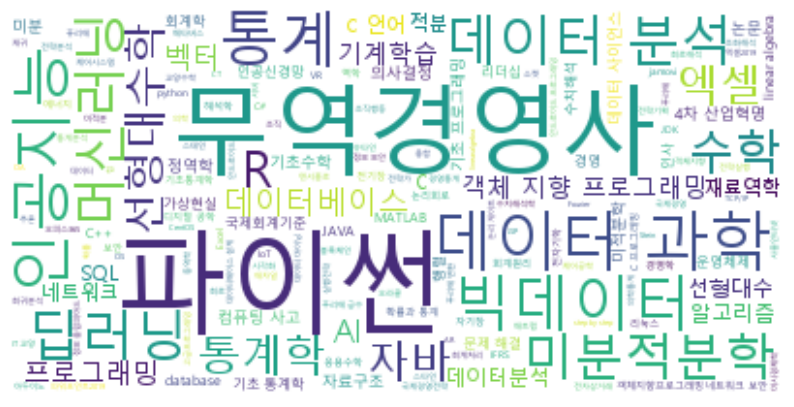

In [116]:
plt.figure(figsize = (10,6))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

### Jupyter에 koNLPy설치 참고

konlpy-ko.readthedocs.io/ko/v0.4.3/install/#installation